In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

In [6]:
# importing data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
print(df.waterfront.value_counts())
waterfront = df[df['waterfront'] == 1.0]
waterfront['price'].describe()

0.0    19075
1.0      146
Name: waterfront, dtype: int64


count    1.460000e+02
mean     1.717215e+06
std      1.145385e+06
min      2.850000e+05
25%      8.275000e+05
50%      1.510000e+06
75%      2.282500e+06
max      7.060000e+06
Name: price, dtype: float64

## Dealing with missing values

In [9]:
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [10]:
df.waterfront.isna().sum()

2376

In [11]:
# Replacing missing waterfront values (assuming that there is no waterfront for missing values)
df.waterfront.fillna(0.0, inplace=True)
df.waterfront.isna().sum()

0

In [12]:
df.waterfront.isna().sum()

0

In [13]:
print(df.view.value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [73]:
# Replacing missing "view" values with median
df.view.fillna(df['view'].median(), inplace=True)
df.view.isna().sum()

0

In [74]:
# Replacing missing "yr_renovated" values with median
df.yr_renovated.fillna(df['yr_renovated'].median(), inplace=True)
df.yr_renovated.isna().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int8
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
has_renovation    21597 non-null float64
been_viewed       21597 non-null float64
day_of_year       21597 non-null int64
month         

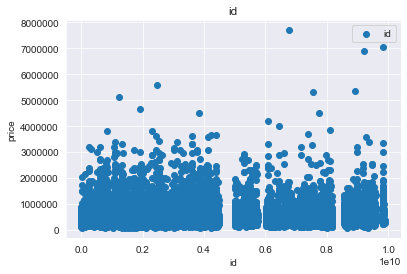

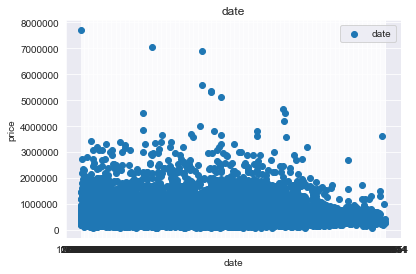

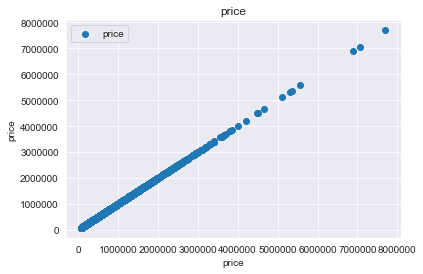

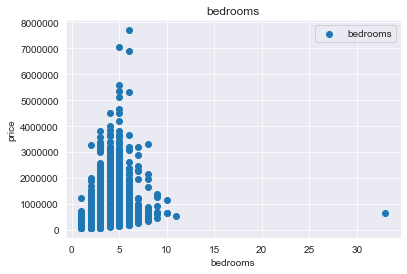

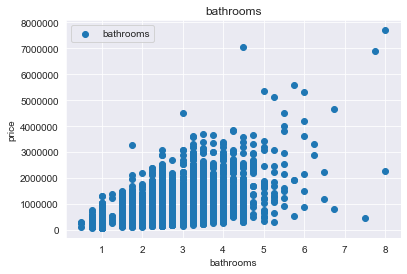

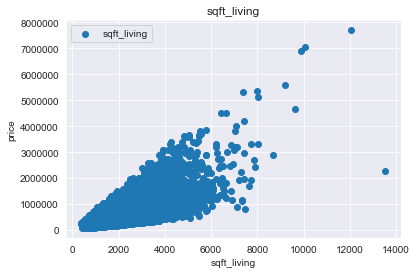

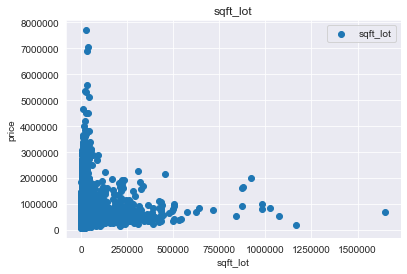

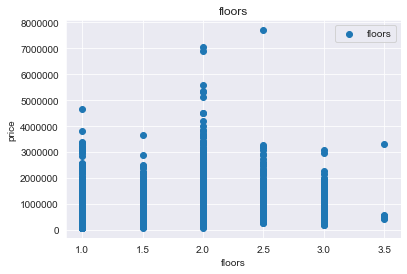

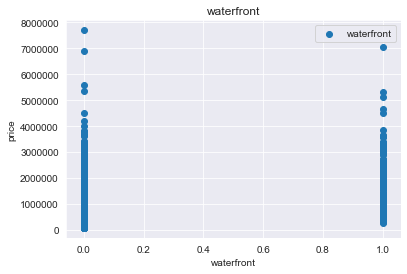

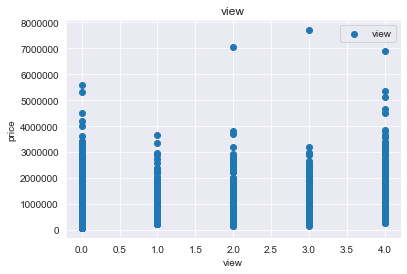

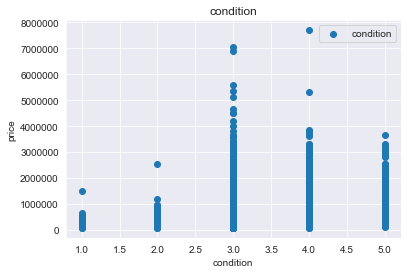

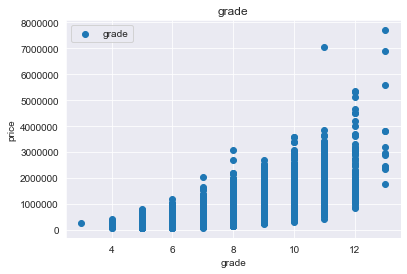

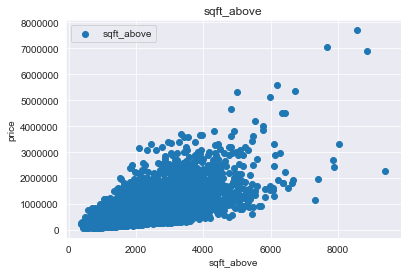

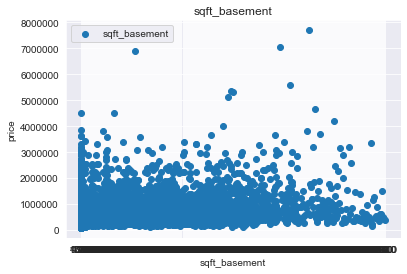

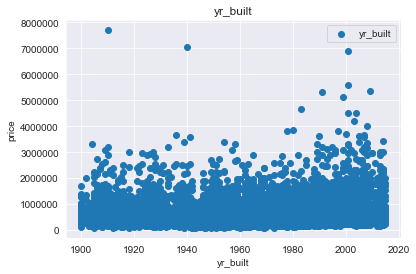

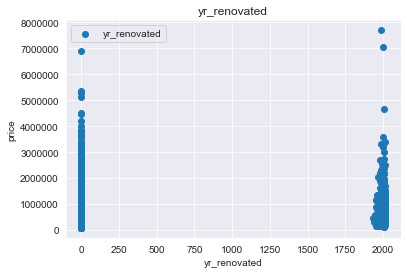

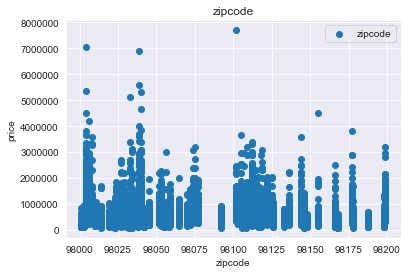

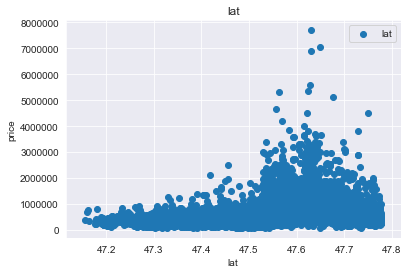

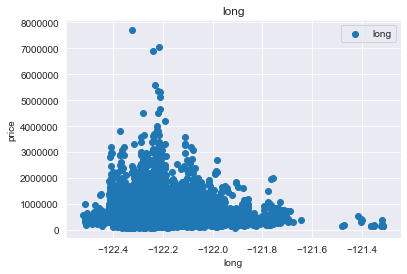

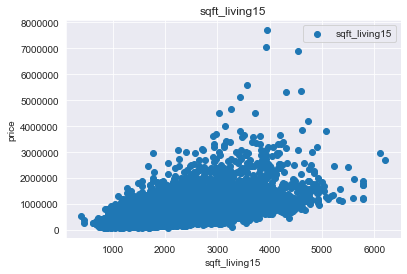

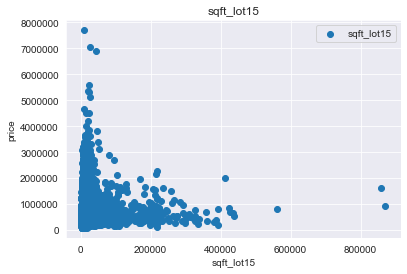

In [17]:
for col in df.columns: 
    plt.scatter(df[col], df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
print(np.dtype(df.date))

object


In [36]:
# Initial model
#Using "sqft_living", "bathrooms", and "sqft_above" as predictors/independent variables
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'

x_cols = df.drop(['price', 'sqft_living','bathrooms', 'sqft_above'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
=============================================================================================
Model:                       OLS                      Adj. R-squared:             0.693      
Dependent Variable:          price                    AIC:                        485286.9020
Date:                        2020-07-29 21:15         BIC:                        490510.2494
No. Observations:            17755                    Log-Likelihood:             -2.4197e+05
Df Model:                    670                      F-statistic:                60.85      
Df Residuals:                17084                    Prob (F-statistic):         0.00       
R-squared:                   0.705                    Scale:                      4.1855e+10 
---------------------------------------------------------------------------------------------
                           Coef.       Std.Err.      t     P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------------------
Intercept               8834115.6360 3379651.6891   2.6139 0.0090  2209650.7166 15458580.5554
date[T.1/12/2015]        108075.9314  207496.7316   0.5209 0.6025  -298639.0043   514790.8670
date[T.1/13/2015]        103530.2864  207386.7321   0.4992 0.6176  -302969.0390   510029.6117
date[T.1/14/2015]         69148.2664  206808.2786   0.3344 0.7381  -336217.2307   474513.7635
date[T.1/15/2015]        127447.2127  207188.3858   0.6151 0.5385  -278663.3336   533557.7589
date[T.1/16/2015]         78203.1273  206871.7220   0.3780 0.7054  -327286.7254   483692.9799
date[T.1/17/2015]         78904.3750  289813.2449   0.2723 0.7854  -489159.3932   646968.1433
date[T.1/19/2015]         50699.6245  217148.3293   0.2335 0.8154  -374933.4353   476332.6843
date[T.1/2/2015]          85746.1750  207180.4803   0.4139 0.6790  -320348.8756   491841.2256
date[T.1/20/2015]        122996.4941  207186.2386   0.5937 0.5528  -283109.8434   529102.8316
date[T.1/21/2015]        130358.3519  206709.1610   0.6306 0.5283  -274812.8644   535529.5682
date[T.1/22/2015]        118907.8759  207227.5825   0.5738 0.5661  -287279.5000   525095.2518
date[T.1/23/2015]        127548.2956  207056.8547   0.6160 0.5379  -278304.4362   533401.0273
date[T.1/24/2015]        -34582.4755  236877.9413  -0.1460 0.8839  -498887.6042   429722.6532
date[T.1/25/2015]         91553.7141  251028.1576   0.3647 0.7153  -400487.2940   583594.7221
date[T.1/26/2015]         60899.1599  207207.3519   0.2939 0.7688  -345248.5618   467046.8817
date[T.1/27/2015]        119839.8516  206892.3005   0.5792 0.5624  -285690.3370   525370.0402
date[T.1/28/2015]        101133.4675  206578.1190   0.4896 0.6244  -303780.8930   506047.8280
date[T.1/29/2015]        127236.7449  207707.3097   0.6126 0.5402  -279890.9454   534364.4353
date[T.1/30/2015]        288597.9314  208405.2424   1.3848 0.1661  -119897.7789   697093.6417
date[T.1/31/2015]         46648.8963  289509.9257   0.1611 0.8720  -520820.3351   614118.1277
date[T.1/5/2015]         114942.9031  206662.4875   0.5562 0.5781  -290136.8284   520022.6345
date[T.1/6/2015]         103770.2258  207633.5308   0.4998 0.6172  -303212.8503   510753.3019
date[T.1/7/2015]         145310.4288  206974.9145   0.7021 0.4826  -260381.6917   551002.5492
date[T.1/8/2015]          73193.4276  206989.0034   0.3536 0.7236  -332526.3086   478913.1638
date[T.1/9/2015]         227609.7667  208149.5366   1.0935 0.2742  -180384.7340   635604.2674
date[T.10/1/2014]        138432.4715  206018.5536   0.6719 0.5016  -265385.0833   542250.0262
date[T.10/10/2014]       102489.6308  206133.8406   0.4972 0.6191  -301553.8985   506533.1600
date[T.10/11/2014]      1369286.9683  250639.2607   5.4632 0.0000   878008.2381  1860565.6984
date[T.10/12/2014]       110511.2414  250606.8302   0.4410 0.6592  -380703.9215   601726.4044
date[T.10/13/2014]        66104.95

In [20]:
#Dealing with categorical variables for year_renovated 
df.loc[df.yr_renovated > 0, "has_renovation"] = 1
df.has_renovation.fillna(0, inplace=True)
df.has_renovation.isna().sum()

0

In [21]:
#Dealing with categorical variables view
df.loc[df.view > 0, "been_viewed"] = 1
df.been_viewed.fillna(0, inplace=True)
df.been_viewed.isna().sum()

0

In [22]:
df.head()
df.tail()
df.been_viewed.unique()

array([0., 1.])

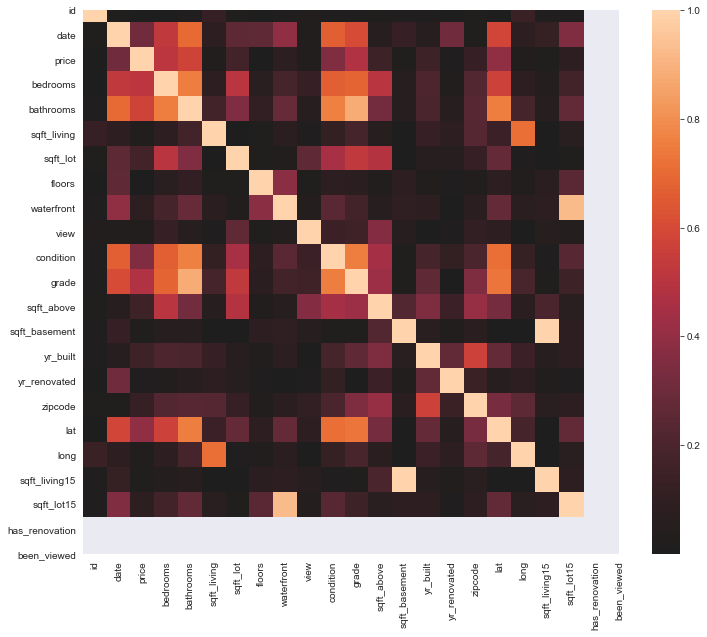

In [23]:
# Visualizing heatmap to detect multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

In [24]:
#Checking for multicollinearity
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_renovation,been_viewed
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


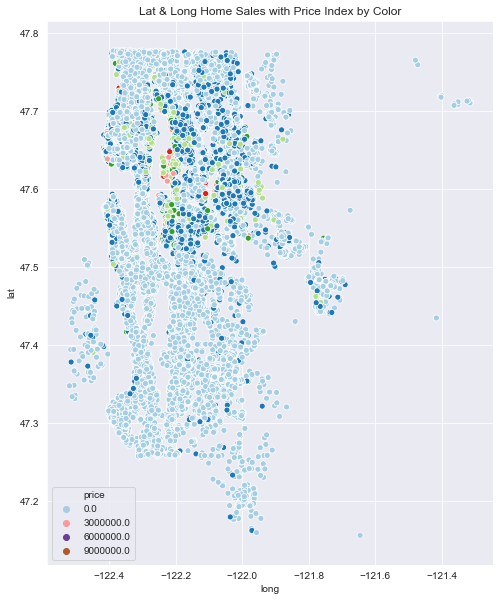

In [25]:
#Visualizing where the most expensive house prices are located
plt.figure(figsize=(8,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

In [28]:
#Binning the grades
#Determine bins by looking at unique values of grade
#bin as 3-5, 5-7, 7-9, 9-11, 11-13
df.grade.unique()

bins = [3, 5, 7, 9, 13]
bins_grd = pd.cut(df['grade'], bins)
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

0    (5, 7]
1    (5, 7]
2    (5, 7]
3    (5, 7]
4    (7, 9]
Name: grade, dtype: category
Categories (4, interval[int64]): [(3, 5] < (5, 7] < (7, 9] < (9, 13]]

Text(0.5, 1.0, 'Grade Bins')

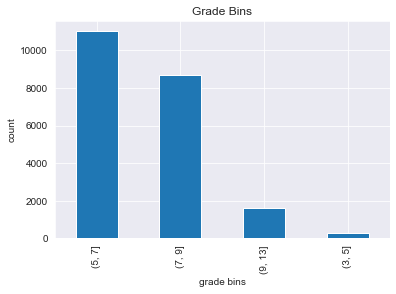

In [29]:
bins_grd.value_counts().plot(kind='bar')
plt.xlabel('grade bins')
plt.ylabel('count')
plt.title('Grade Bins')

In [30]:
df['grade']=bins_grd
df['grade'] = df['grade'].cat.codes
grd_dummy = pd.get_dummies(bins_grd, prefix='grd')
df2 = df.drop(['grade'], axis=1)
df2 = pd.concat([df, grd_dummy], axis=1)
df2.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,has_renovation,been_viewed,"grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]"
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,0.0,0.0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,1.0,0.0,0,1,0,0


In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_renovation,been_viewed
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,0.0


In [32]:
#Trying the model with modified data and different parameters
#using 'sqft_living' instead of 'sqft_living' and 'sqft_above'
#adding 'has_renovation' and 'been_viewed' as independent variables

outcome = 'price'

x_cols = df.drop(['price', 'sqft_living','bathrooms', 'has_renovation', 'been_viewed'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
============================================================================================
Model:                      OLS                      Adj. R-squared:             0.714      
Dependent Variable:         price                    AIC:                        484007.2228
Date:                       2020-08-03 10:36         BIC:                        489238.3546
No. Observations:           17755                    Log-Likelihood:             -2.4133e+05
Df Model:                   671                      F-statistic:                67.21      
Df Residuals:               17083                    Prob (F-statistic):         0.00       
R-squared:                  0.725                    Scale:                      3.8942e+10 
--------------------------------------------------------------------------------------------
                           Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------------------
Intercept                 11977.2722 3259495.3784   0.0037 0.9971 -6376968.9463 6400923.4907
date[T.1/12/2015]        150380.2941  200143.6582   0.7514 0.4524  -241921.8631  542682.4513
date[T.1/13/2015]        138052.6646  200043.4082   0.6901 0.4901  -254052.9922  530158.3215
date[T.1/14/2015]         79939.3930  199486.5275   0.4007 0.6886  -311074.7205  470953.5065
date[T.1/15/2015]        127908.9812  199853.9548   0.6400 0.5222  -263825.3275  519643.2899
date[T.1/16/2015]         85663.5627  199550.6190   0.4293 0.6677  -305476.1766  476803.3019
date[T.1/17/2015]        113406.6764  279558.1344   0.4057 0.6850  -434556.0229  661369.3757
date[T.1/19/2015]         37388.2115  209458.4189   0.1785 0.8583  -373171.8347  447948.2577
date[T.1/2/2015]         124204.9166  199845.3794   0.6215 0.5343  -267512.5835  515922.4166
date[T.1/20/2015]        155595.0303  199852.1109   0.7786 0.4363  -236135.6642  547325.7247
date[T.1/21/2015]        140173.9623  199391.1043   0.7030 0.4821  -250653.1118  531001.0365
date[T.1/22/2015]        136761.2735  199889.2340   0.6842 0.4939  -255042.1862  528564.7331
date[T.1/23/2015]        140055.1983  199727.0897   0.7012 0.4832  -251430.4417  531540.8382
date[T.1/24/2015]        -12968.7559  228485.0360  -0.0568 0.9547  -460822.9287  434885.4170
date[T.1/25/2015]        143198.9533  242146.0688   0.5914 0.5543  -331432.2491  617830.1557
date[T.1/26/2015]         76107.2377  199870.5098   0.3808 0.7034  -315659.5205  467873.9958
date[T.1/27/2015]        140679.1913  199566.0419   0.7049 0.4809  -250490.7785  531849.1612
date[T.1/28/2015]        143556.3098  199263.9401   0.7204 0.4713  -247021.5093  534134.1290
date[T.1/29/2015]        135411.3839  200353.2625   0.6759 0.4991  -257301.6192  528124.3870
date[T.1/30/2015]        240570.3387  201033.4757   1.1967 0.2315  -153475.9524  634616.6297
date[T.1/31/2015]         53691.9349  279235.9626   0.1923 0.8475  -493639.2744  601023.1442
date[T.1/5/2015]         131696.9293  199344.0965   0.6607 0.5088  -259038.0047  522431.8633
date[T.1/6/2015]         133542.5761  200284.3090   0.6668 0.5049  -259035.2712  526120.4233
date[T.1/7/2015]         156501.5258  199646.6311   0.7839 0.4331  -234826.4072  547829.4588
date[T.1/8/2015]          99955.5823  199661.0560   0.5006 0.6166  -291400.6250  491311.7896
date[T.1/9/2015]         213500.0309  200780.8682   1.0633 0.2876  -180051.1234  607051.1852
date[T.10/1/2014]        172496.5275  198723.3001   0.8680 0.3854  -217021.5818  562014.6367
date[T.10/10/2014]       126063.2808  198836.7903   0.6340 0.5261  -263677.2808  515803.8424
date[T.10/11/2014]      1212361.2031  241808.3101   5.0137 0.0000   738392.0424 1686330.3638
date[T.10/12/2014]       196320.3478  241722.3517   0.8122 0.4167  -277480.3256  670121.0211
date[T.10/13/2014]        85645.1520  199642.8633   0.4290 0.6679  -305675.3

In [33]:
#Dealing with datetime
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month

display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [34]:
df.head()
print(df.columns)
df.dtypes

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_renovation',
       'been_viewed', 'day_of_year', 'month'],
      dtype='object')


id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront               float64
view                     float64
condition                  int64
grade                       int8
sqft_above                 int64
sqft_basement             object
yr_built                   int64
yr_renovated             float64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
has_renovation           float64
been_viewed              float64
day_of_year                int64
month                      int64
dtype: object

In [90]:
#Deleting the 'date' and 'sqft_basement' columns to make the data more consistent for testing the model
#df.drop(["date"], axis=1, inplace=True)
#df.drop(["sqft_basement"], axis=1, inplace=True)

In [66]:
df.head()
df.dtypes

id                  int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront        float64
view              float64
condition           int64
grade                int8
sqft_above          int64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
has_renovation    float64
been_viewed       float64
day_of_year         int64
month               int64
dtype: object

In [79]:
#Training and testing the model
#price', 'sqft_living','bathrooms', 'has_renovation', 'been_viewed'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df
y = data['price']
X = data.drop(['price','sqft_living','bathrooms','has_renovation', 'been_viewed'], axis = 1)

In [80]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [81]:
len(y_test)

4320

In [82]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 48122253456.69656
Test Mean Squarred Error: 45567248175.23284


In [83]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 219367.8496423224
Test Root Mean Squarred Error: 213464.86402973405


In [77]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_renovation,been_viewed
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,0.0


## Model explanation
The R-squared has increased from 0.705 to 0.725 on the second iteration of a model.
Used 'sqft_living','bathrooms','has_renovation', 'been_viewed' as independent variables.
The size of the house indicated by number of bathrooms and living square footage were the strongest predictors of price.
The exact number of views and the year of renovation are not too important in predicting the price, however the price is higher for houses that have been viewed at least once and have been renovated.
